In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [5]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


In [57]:
p=(1/(pow(2*math.pi,(d/2))*pow(np.linalg.det(sigma),1/2)))*np.exp(1/2*(X[0]-means[0]).T@np.linalg.inv(sigmas[0])@(X[0]-means[0]))


Solution
===

In [129]:
def compute_log_p(X, mean, sigma):
    d=X[0].shape[0]
    def compute_p(x):
        p=(1/(pow(2*math.pi,(d/2))*pow(np.linalg.det(sigma),1/2)))*np.exp(1/2*(x-mean).T@np.linalg.inv(sigma)@(x-mean))
        return p
    ps=np.apply_along_axis(compute_p, 1, X)
    return ps

In [130]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

In [131]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1]


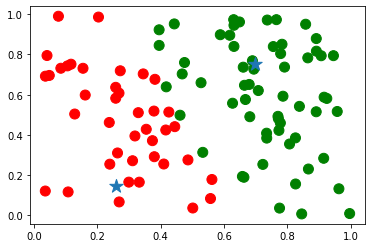

In [133]:
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()